In [9]:
from diffusers import StableDiffusionPipeline
from diffusers import StableDiffusionXLPipeline
from peft import get_peft_model, LoraConfig
import torch


## Load Pretrained Stable Diffusion Model

In [10]:

# Load the base SDXL model
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")




Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  8.81it/s]


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:12<00:00,  4.05it/s]


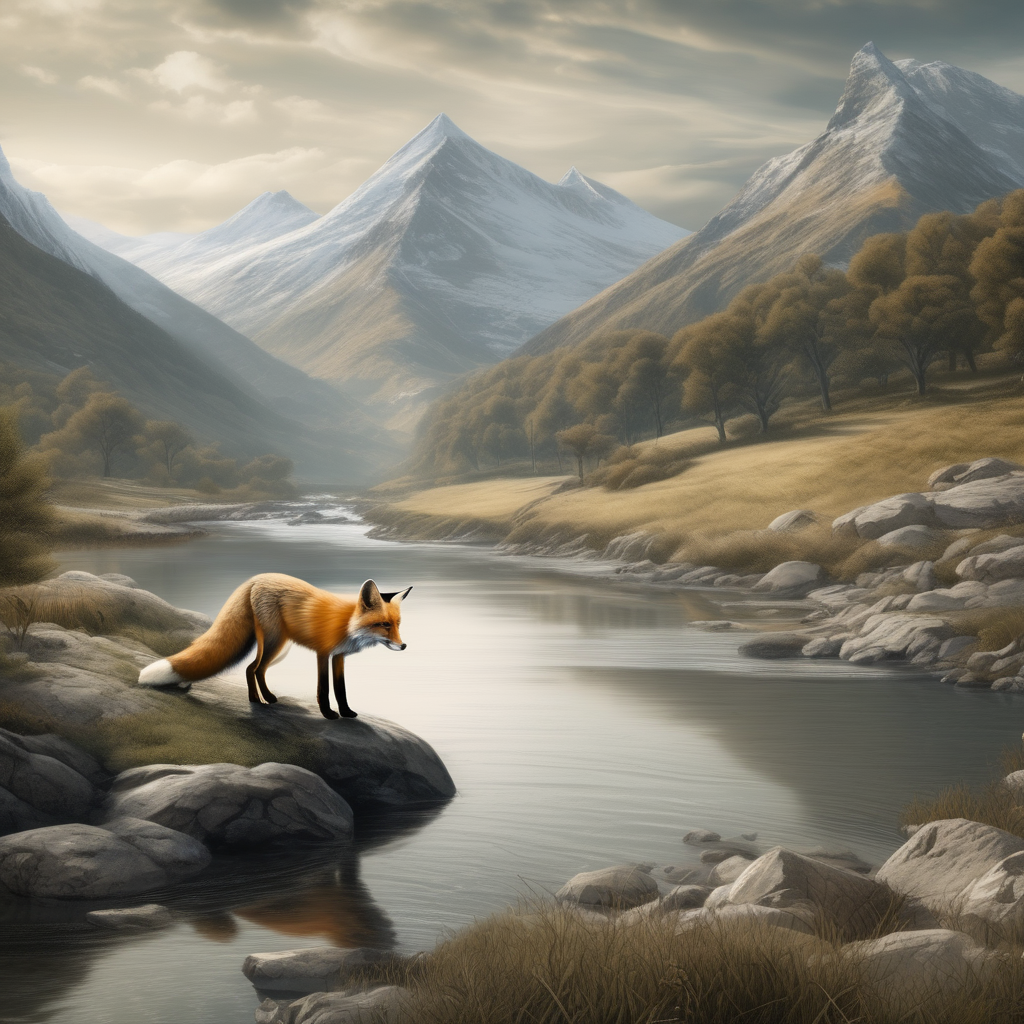

In [11]:
# Generate an image from a prompt
prompt = "a mountain landscape with a river and a fox in the foreground, highly detailed, photorealistic"
image_1 = pipe(prompt, guidance_scale=7.5).images[0]

# Save the image
image_1


## Configure LoRA for Fine-Tuning

In [12]:
pipe.load_lora_weights(
    "peft-internal-testing/artificialguybr__3DRedmond-V1",
    weight_name="3DRedmond-3DRenderStyle-3DRenderAF.safetensors",
    adapter_name="3d"
)

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:15<00:00,  3.23it/s]


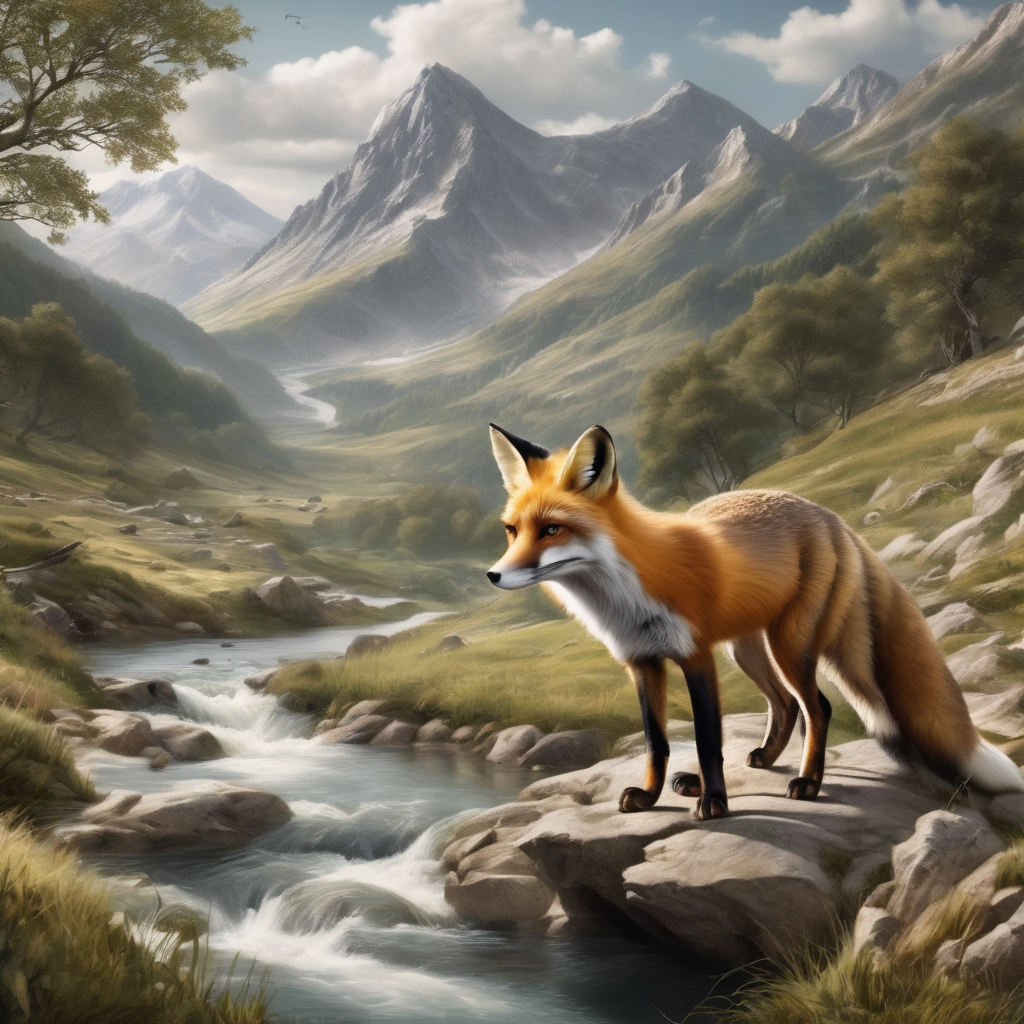

In [13]:
image_2=pipe("a mountain landscape with a river and a fox in the foreground, highly detailed, photorealistic").images[0]
image_2

In [14]:
# Changed to a new adapter

In [ ]:
pipe.load_lora_weights(
    "ostris/super-cereal-sdxl-lora",
    weight_name="cereal_box_sdxl_v1.safetensors",
    adapter_name="cereal"
)

pipe.set_adapters("cereal")

OSError: strangerzonehf/Flux-Isometric-3D-LoRA does not appear to have a file named cereal_box_sdxl_v1.safetensors.

  2%|▏         | 1/50 [00:00<00:11,  4.27it/s]

100%|██████████| 50/50 [00:15<00:00,  3.22it/s]


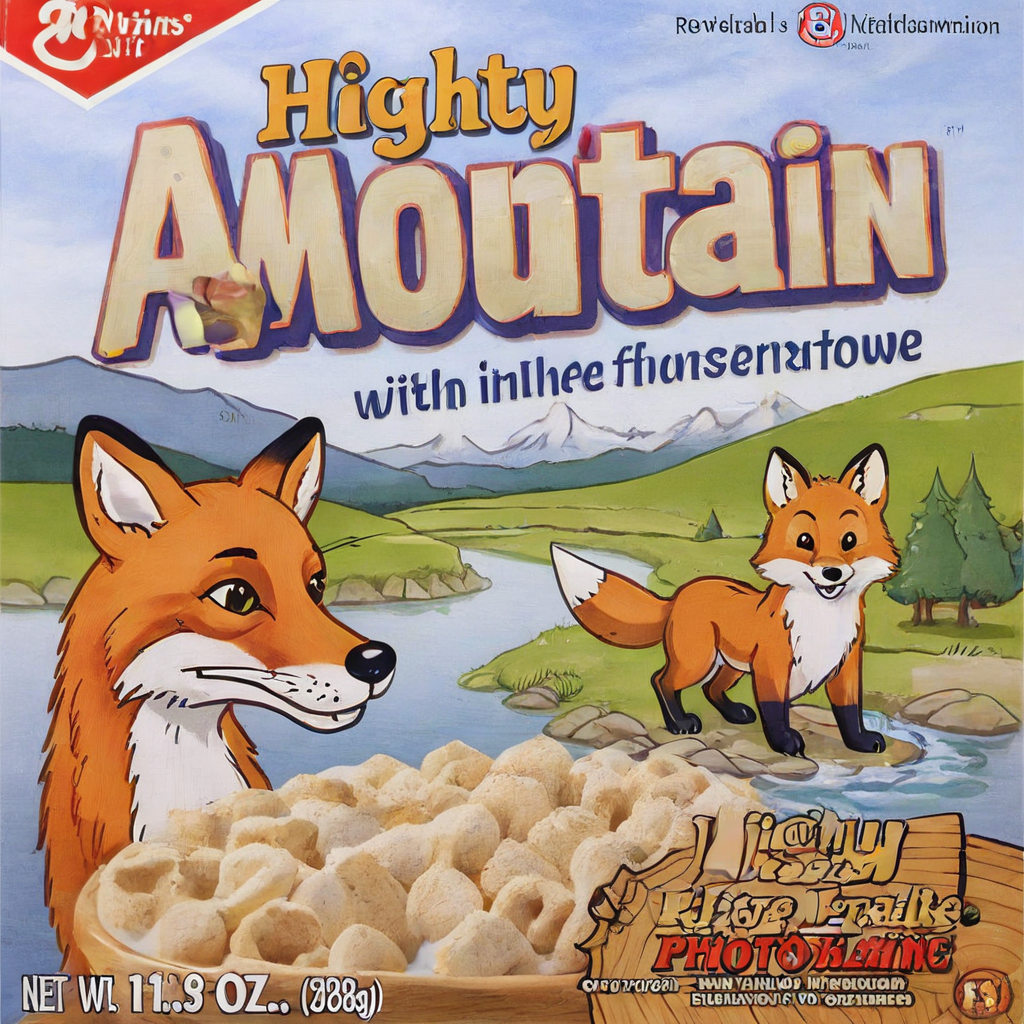

In [16]:
image_3=pipe("a mountain landscape with a river and a fox in the foreground, highly detailed, photorealistic").images[0]
image_3